In [3]:
import os
print(os.getcwd())


/work/festusedward-n


In [4]:
import os
print(os.listdir())  # This will print all files in the current directory.


['.vscode-server', '.local', '.bash_logout', 'Dataset_TZ_KM', '.profile', 'One-Class_ SVM_on_combined_benign_attack.ipynb', '.jupyter', '.dotnet', '.bashrc', '.ipython', '.wget-hsts', '.ipynb_checkpoints', '.cache', '.config']


In [5]:
import os
print(os.listdir('/work/festusedward-n/Dataset_TZ_KM'))


['combined_with_simulated_attacks.csv', 'mouse_modified_trimmed_clean.csv', 'datapreparation.ipynb', 'simulated_attack_dataset.csv', 'combined_data_10.csv', 'logger_keystrokelog.csv', 'logger_mouseactionlog_modified.csv', 'synthetic_attack_data_5.csv', 'synthetic_attack_data_30.csv', 'mouse_modified_trimmed.csv', 'combined_user_features1.csv', 'mouse_modified.csv', 'mouse_modified_trimmed_clean_imputed.csv', 'logger_keystrokelog_modified.csv', 'synthetic_attack_data_10.csv', '.ipynb_checkpoints', 'combined_data_5.csv', 'logger_mouseactionlog.csv', 'combined_data_30.csv', 'generate_attack_mousedata.ipynb']


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix

# Load the combined dataset (5% attack data example)
combined_data = pd.read_csv('/work/festusedward-n/Dataset_TZ_KM/combined_data_5.csv')

# Separate features and target (label)
X = combined_data.drop(columns=['label', 'id', 'timestamp'], errors='ignore')  # Drop 'label', 'id', and 'timestamp'
y = combined_data['label']  # The label is either 0 (Benign) or 1 (Attack)

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode each categorical column
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the One-Class SVM model
model = OneClassSVM(nu=0.1, kernel="rbf", gamma="auto")  # nu is the fraction of outliers

# Train the model on only benign data
benign_data = X_scaled[y == 0]  # Only benign data
model.fit(benign_data)

# Predict anomalies in the combined dataset (benign + attack)
y_pred = model.predict(X_scaled)

# Convert predictions: -1 for anomaly (attack), 1 for normal (benign)
y_pred = [1 if label == 1 else 0 for label in y_pred]

# Evaluate the performance of the model
print("Classification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.10      0.17    252397
           1       0.00      0.00      0.00     12619

    accuracy                           0.10    265016
   macro avg       0.33      0.05      0.09    265016
weighted avg       0.63      0.10      0.17    265016

Confusion Matrix:
[[ 25238 227159]
 [ 12619      0]]


In [8]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # contamination is the expected proportion of outliers

# Train the model on only benign data
benign_data = X_scaled[y == 0]  # Only benign data
model.fit(benign_data)

# Predict anomalies in the combined dataset (benign + attack)
y_pred = model.predict(X_scaled)

# Convert predictions: -1 for anomaly (attack), 1 for normal (benign)
y_pred = [1 if label == 1 else 0 for label in y_pred]

# Evaluate the performance of the model
print("Classification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.05      0.09    252397
           1       0.01      0.16      0.02     12619

    accuracy                           0.06    265016
   macro avg       0.28      0.10      0.05    265016
weighted avg       0.52      0.06      0.09    265016

Confusion Matrix:
[[ 12620 239777]
 [ 10629   1990]]


In [10]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 43.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 81.5 MB/s eta 0:00:009 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 84.1 MB/s eta 0:00:006 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


AUC-ROC: 0.10384965129942322
Precision-Recall AUC: 0.10301839307556067


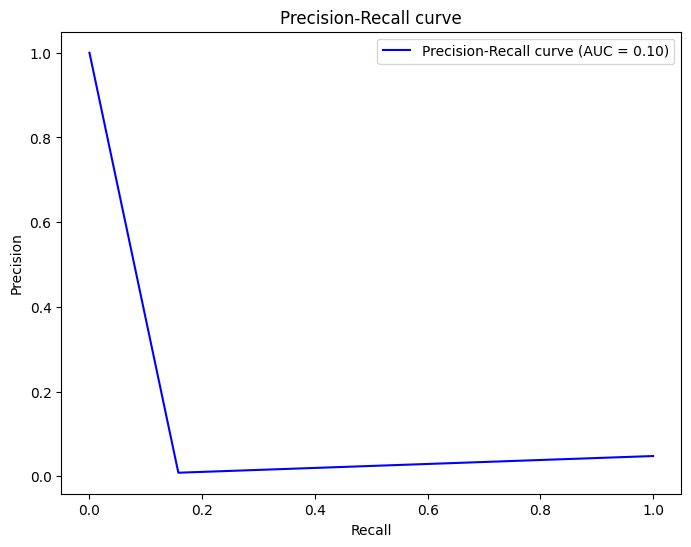

NameError: name 'roc_curve' is not defined

In [11]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate AUC-ROC
roc_auc = roc_auc_score(y, y_pred)
print(f"AUC-ROC: {roc_auc}")

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y, y_pred)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="best")
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score



# Load the combined dataset (5% attack data example)
combined_data = pd.read_csv('/work/festusedward-n/Dataset_TZ_KM/combined_data_30.csv')

# Separate features and target (label)
X = combined_data.drop(columns=['label', 'id', 'timestamp'], errors='ignore')  # Drop 'label', 'id', and 'timestamp'
y = combined_data['label']  # The label is either 0 (Benign) or 1 (Attack)

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode each categorical column
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the One-Class SVM model
model = OneClassSVM(nu=0.1, kernel="rbf", gamma="auto")  # nu is the fraction of outliers

# Train the model on only benign data
benign_data = X_scaled[y == 0]  # Only benign data
model.fit(benign_data)

# Predict anomalies in the combined dataset (benign + attack)
y_pred = model.predict(X_scaled)

# Convert predictions: -1 for anomaly (attack), 1 for normal (benign)
y_pred = [1 if label == 1 else 0 for label in y_pred]

# Evaluate the performance of the model
print("Classification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.10      0.14    252397
           1       0.00      0.00      0.00     75719

    accuracy                           0.08    328116
   macro avg       0.13      0.05      0.07    328116
weighted avg       0.19      0.08      0.11    328116

Confusion Matrix:
[[ 25241 227156]
 [ 75719      0]]


In [14]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # contamination is the expected proportion of outliers

# Train the model on only benign data
benign_data = X_scaled[y == 0]  # Only benign data
model.fit(benign_data)

# Predict anomalies in the combined dataset (benign + attack)
y_pred = model.predict(X_scaled)

# Convert predictions: -1 for anomaly (attack), 1 for normal (benign)
y_pred = [1 if label == 1 else 0 for label in y_pred]

# Evaluate the performance of the model
print("Classification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.05      0.08    252397
           1       0.12      0.43      0.19     75719

    accuracy                           0.14    328116
   macro avg       0.17      0.24      0.14    328116
weighted avg       0.20      0.14      0.11    328116

Confusion Matrix:
[[ 12620 239777]
 [ 42828  32891]]


In [15]:
pip install pyod


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 KB 3.4 MB/s eta 0:00:002.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 11.8 MB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 25.3 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pyod

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pyod
print(dir(pyod.models))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']


In [8]:
!pip uninstall pyod --yes


Found existing installation: pyod 2.0.5
Uninstalling pyod-2.0.5:
  Successfully uninstalled pyod-2.0.5


In [9]:
!pip install --user pyod


  Using cached pyod-2.0.5-py3-none-any.whl (200 kB)


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the combined dataset (5% attack data example)
combined_data = pd.read_csv('/work/festusedward-n/Dataset_TZ_KM/combined_data_30.csv')


# Separate features (X) and target (y)
X = combined_data.drop(columns=['label', 'id', 'timestamp'], errors='ignore')  # Drop label, id, and timestamp
y = combined_data['label']  # Label column (Benign = 0, Attack = 1)

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode each categorical column
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the LOF model
model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # contamination is the expected ratio of anomalies in the data

# Fit the model to the training data and predict
y_pred = model.fit_predict(X_test_scaled)

# Convert LOF results (-1: anomaly, 1: normal) to binary (1: attack, 0: benign)
y_pred = [1 if label == -1 else 0 for label in y_pred]  # Convert -1 to 1 (attack) and 1 to 0 (benign)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))







Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82     50561
           1       0.17      0.07      0.10     15063

    accuracy                           0.70     65624
   macro avg       0.47      0.48      0.46     65624
weighted avg       0.63      0.70      0.66     65624

Confusion Matrix:
[[45126  5435]
 [13935  1128]]


In [9]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 KB 4.5 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 31.8 MB/s eta 0:00:00m eta 0:00:010:0101
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install --upgrade scikit-learn imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.7.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install --upgrade scikit-learn imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.7.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)


scikit-learn version: 1.6.1
imbalanced-learn version: 0.13.0


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the combined dataset (30% attack data example)
combined_data = pd.read_csv('/work/festusedward-n/Dataset_TZ_KM/combined_data_30.csv')

# Separate features (X) and target (y)
X = combined_data.drop(columns=['label', 'id', 'timestamp'], errors='ignore')  # Drop label, id, and timestamp
y = combined_data['label']  # Label column (Benign = 0, Attack = 1)

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode each categorical column
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training set to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can set the ratio here
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Instantiate the LOF model (used for anomaly detection)
model = LocalOutlierFactor(n_neighbors=40, contamination=0.1)  # Increase neighbors if needed

# Fit the model and predict anomalies on both the training and test sets
y_train_pred = model.fit_predict(X_train_res)  # Fit and predict on the training data
y_test_pred = model.fit_predict(X_test_scaled)  # Fit and predict on the test data

# Convert LOF results (-1: anomaly, 1: normal) to binary (1: attack, 0: benign)
y_train_pred = [1 if label == -1 else 0 for label in y_train_pred]  # Convert -1 to 1 (attack) and 1 to 0 (benign)
y_test_pred = [1 if label == -1 else 0 for label in y_test_pred]  # Convert -1 to 1 (attack) and 1 to 0 (benign)

# Print the classification report and confusion matrix
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))


/work/festusedward-n/.local/lib/python3.10/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83     50561
           1       0.21      0.09      0.13     15063

    accuracy                           0.71     65624
   macro avg       0.49      0.50      0.48     65624
weighted avg       0.64      0.71      0.67     65624

Confusion Matrix (Test Data):
[[45390  5171]
 [13671  1392]]


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the combined dataset (30% attack data example)
combined_data = pd.read_csv('/work/festusedward-n/Dataset_TZ_KM/combined_data_30.csv')

# Separate features (X) and target (y)
X = combined_data.drop(columns=['label', 'id', 'timestamp'], errors='ignore')  # Drop label, id, and timestamp
y = combined_data['label']  # Label column (Benign = 0, Attack = 1)

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode each categorical column
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # This will add synthetic data for the minority class
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Instantiate the Isolation Forest model with a fine-tuned contamination parameter
model = IsolationForest(contamination=0.1, random_state=42)  # Set contamination to 0.1 (based on expected attack ratio)

# Fit the model to the resampled training data
model.fit(X_train_res)

# Predict on the test set (since Isolation Forest doesn't use the same prediction method, we can use the score)
y_pred = model.predict(X_test_scaled)

# Convert the IsolationForest results (1: normal, -1: anomaly) to binary (1: attack, 0: benign)
y_pred = [1 if label == -1 else 0 for label in y_pred]  # Convert -1 to 1 (attack) and 1 to 0 (benign)

# Print the classification report and confusion matrix
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred))

print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_pred))


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.78      0.92      0.85     50561
           1       0.35      0.14      0.20     15063

    accuracy                           0.74     65624
   macro avg       0.56      0.53      0.52     65624
weighted avg       0.68      0.74      0.70     65624

Confusion Matrix (Test Data):
[[46562  3999]
 [12940  2123]]


In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the combined dataset (30% attack data example)
combined_data = pd.read_csv('/work/festusedward-n/Dataset_TZ_KM/combined_data_30.csv')

# Separate features (X) and target (y)
X = combined_data.drop(columns=['label', 'id', 'timestamp'], errors='ignore')
y = combined_data['label']

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the data
smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Instantiate IsolationForest without class_weight (removing the class_weight parameter)
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model on the resampled data
model.fit(X_train_res)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Convert the Isolation Forest output (1 for normal, -1 for outlier) to binary (1 for attack, 0 for benign)
y_pred = [1 if label == -1 else 0 for label in y_pred]

# Print the classification report and confusion matrix
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred))

print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_pred))


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83     50561
           1       0.23      0.10      0.14     15063

    accuracy                           0.72     65624
   macro avg       0.50      0.50      0.48     65624
weighted avg       0.65      0.72      0.67     65624

Confusion Matrix (Test Data):
[[45451  5110]
 [13563  1500]]


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier

# Load the combined dataset (example with 30% attack data)
combined_data = pd.read_csv('/work/festusedward-n/Dataset_TZ_KM/combined_data_30.csv')

# Separate features (X) and target (y)
X = combined_data.drop(columns=['label', 'id', 'timestamp'], errors='ignore')  # Drop label, id, and timestamp
y = combined_data['label']  # Label column (Benign = 0, Attack = 1)

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode each categorical column
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------- SMOTE for balancing -------------------------
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# ---------------------- Instantiate models -------------------------
# IsolationForest
model_if = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
# Fit the model
y_pred_if = model_if.fit_predict(X_res)
y_pred_if = [1 if label == -1 else 0 for label in y_pred_if]  # Convert to binary labels (1: attack, 0: benign)

# One-Class SVM
model_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
model_svm.fit(X_res)
y_pred_svm = model_svm.predict(X_scaled)
y_pred_svm = [1 if label == -1 else 0 for label in y_pred_svm]  # Convert to binary labels

# Local Outlier Factor (LOF)
model_lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = model_lof.fit_predict(X_scaled)
y_pred_lof = [1 if label == -1 else 0 for label in y_pred_lof]  # Convert to binary labels

# ---------------------- Voting Classifier to combine the models -------------------
voting_clf = VotingClassifier(estimators=[('if', model_if), ('svm', model_svm), ('lof', model_lof)], voting='hard')
voting_clf.fit(X_res, y_res)  # Fit the ensemble model

# ---------------------- Evaluate on Test Data ----------------------
y_pred_voting = voting_clf.predict(X_scaled)

# Print the classification report and confusion matrix
print("Classification Report (Test Data):")
print(classification_report(y, y_pred_voting))

print("Confusion Matrix (Test Data):")
print(confusion_matrix(y, y_pred_voting))


/work/festusedward-n/.local/lib/python3.10/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


ValueError: The estimator IsolationForest should be a classifier.